<a href="https://colab.research.google.com/github/Rahul21sai/ML_Mini_projects/blob/main/Medical_Insurance_Cost_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE DEPENDENCIES FOR THE PROJECT**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#data link = "https://www.kaggle.com/datasets/mirichoi0218/insurance"
data = pd.read_csv('/content/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.shape

(1338, 7)

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


3 categorical features :
sex
smoker
region

1.  sex
2.smoker
3.region



<ipython-input-8-7cb22656a871>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


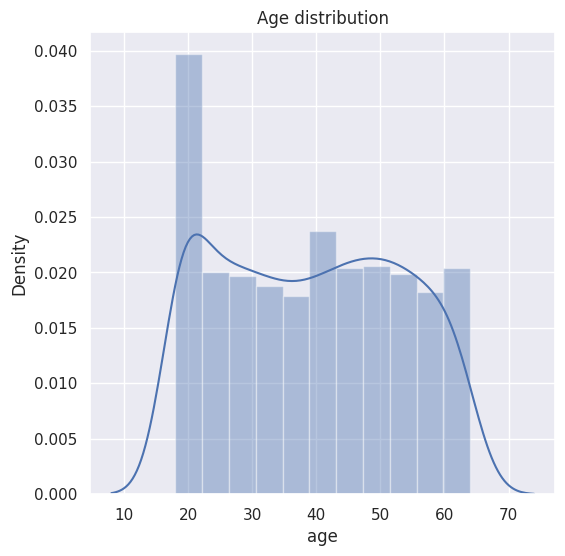

In [8]:
#distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age distribution')
plt.show()

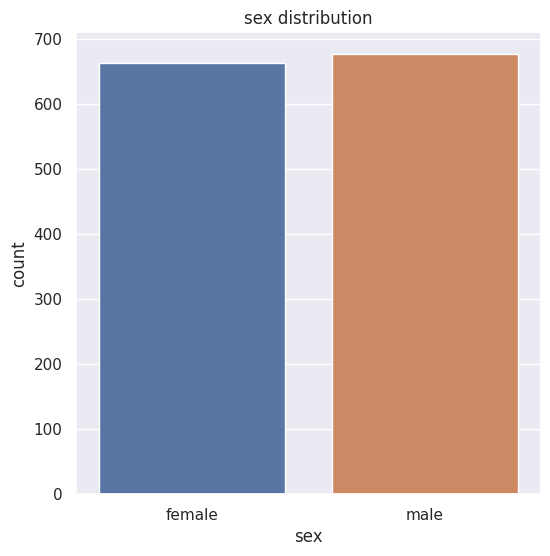

In [9]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title('sex distribution')
plt.show()


<ipython-input-10-4ff9ade27cec>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


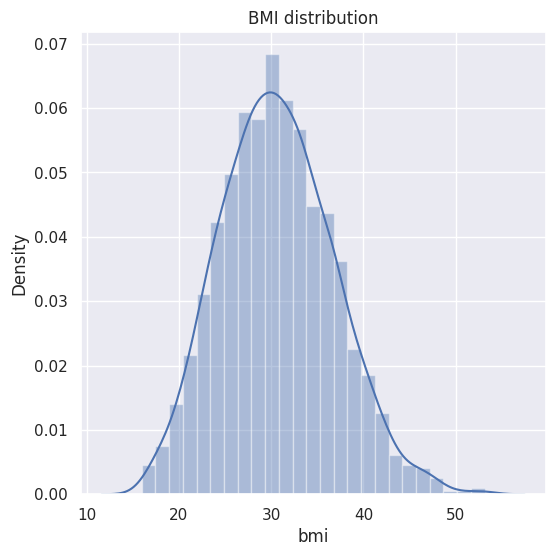

In [10]:
#bmi
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('BMI distribution')
plt.show()

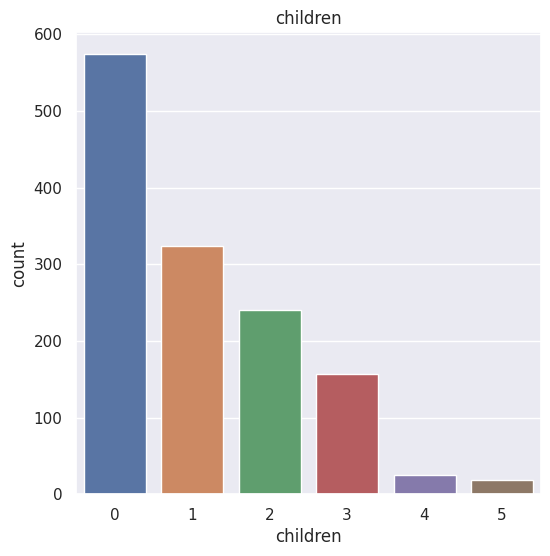

In [11]:
#children
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('children')
plt.show()

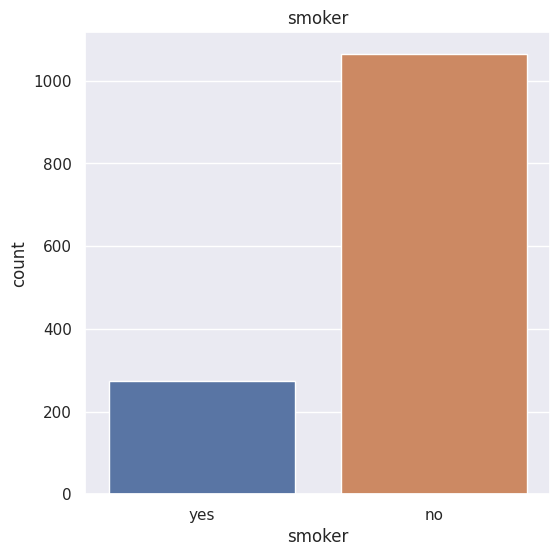

In [12]:
#smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data)
plt.title('smoker')
plt.show()

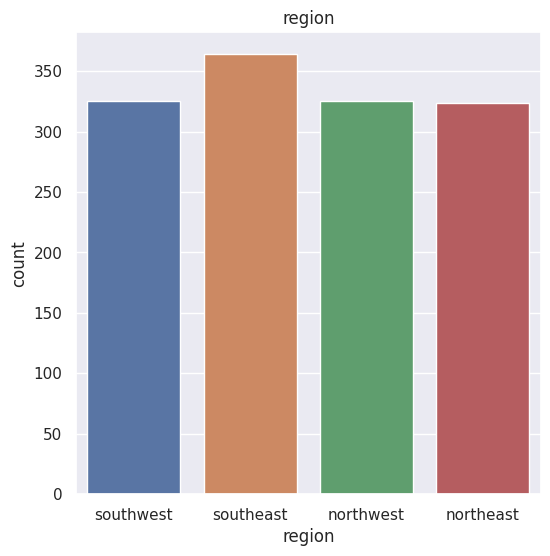

In [13]:
#region
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data)
plt.title('region')
plt.show()

<ipython-input-14-6fca0e441944>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


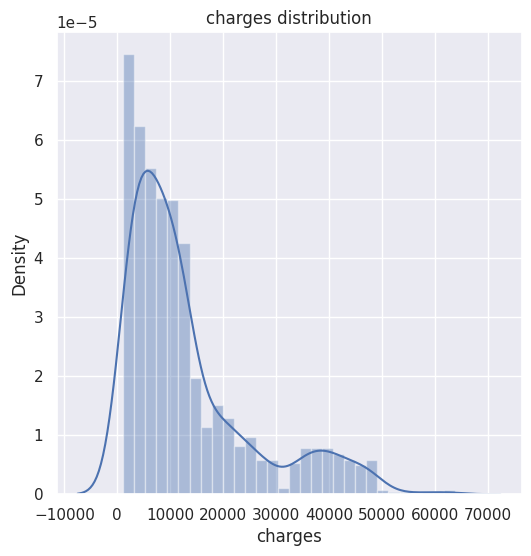

In [14]:
#charges
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('charges distribution')
plt.show()

In [15]:
#checking the distribution
print(data.sex.value_counts())
print(data.smoker.value_counts())
print(data.children.value_counts())
print(data.region.value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [16]:
 #encoding the data
data.replace({'sex':{'male' : 0,'female':1},'smoker':{'yes':0,'no':1},'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace = True)

In [17]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [18]:
x = data.drop(columns='charges',axis = 1)
y = data['charges']

In [19]:
print(x)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [20]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [21]:
#train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [22]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [23]:
#training the model
model = LinearRegression()

In [24]:
model.fit(x_train,y_train)

LinearRegression()

In [25]:
#predcition
x_train_predcition = model.predict(x_train)

In [26]:
# R square error
error_score = metrics.r2_score(y_train,x_train_predcition)

In [27]:
print("R squared error :",error_score)#accuracy score for classification regression r square error

R squared error : 0.7518195459072954


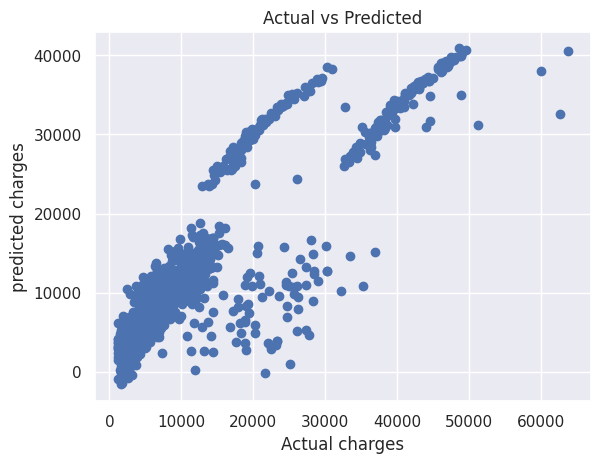

In [28]:
#visualize the acutal prize and predicted
plt.scatter(y_train,x_train_predcition)
plt.xlabel("Actual charges")
plt.ylabel("predicted charges")
plt.title("Actual vs Predicted")
plt.show()

In [29]:
#predcition
test_predcition = model.predict(x_test)

In [30]:
# R square error
error_score = metrics.r2_score(y_test,test_predcition)
print(error_score)

0.7454471618659976


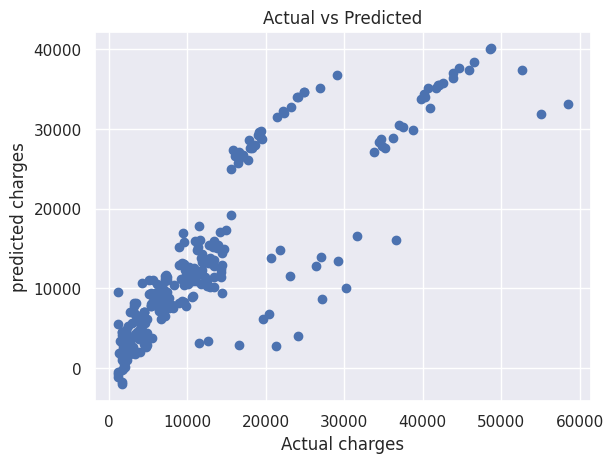

In [31]:
#visualize the acutal prize and predicted
plt.scatter(y_test,test_predcition)
plt.xlabel("Actual charges")
plt.ylabel("predicted charges")
plt.title("Actual vs Predicted")
plt.show()

In [32]:
#predicitive system
input = (32,0,28.88,0,1,2)
input_numpy = np.asarray(input)
input_reshaped =input_numpy.reshape(1,-1)
prediction = model.predict(input_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
print(prediction)

[5476.8728605]


In [34]:
#predicitive system
input = (34,1,31.92,1,0,3)
input_numpy = np.asarray(input)
input_reshaped =input_numpy.reshape(1,-1)
prediction = model.predict(input_reshaped)
print(prediction)

[31831.78651323]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
